In [ ]:
#Step 1: Data Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

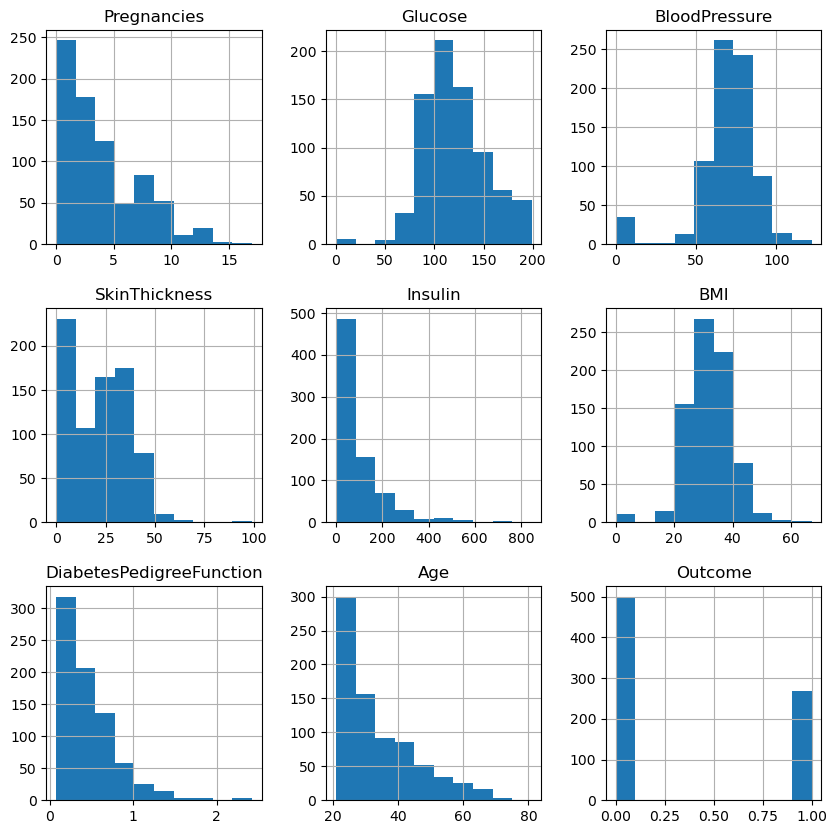

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("diabetes.csv")

# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize distributions of numeric variables
import matplotlib.pyplot as plt
df.hist(figsize=(10,10))
plt.show()


In [ ]:
Step 2: Data Preprocessing

In [2]:
# Impute missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = imputer.fit_transform(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.fit_transform(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

# Encode categorical variables if any

# Handle outliers if necessary


In [ ]:
#Step 3: Feature Selection/Engineering

In [3]:
# Feature selection using correlation matrix
corr_matrix = df.corr()
print(corr_matrix['Outcome'].sort_values(ascending=False))

# Feature engineering if needed


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [ ]:
#Step 4: Model Selection

In [4]:
# Importing necessary models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Splitting the data into train and test sets
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train models and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} Accuracy: {model.score(X_test, y_test)}')


Logistic Regression Accuracy: 0.7532467532467533
Decision Tree Accuracy: 0.7662337662337663
Random Forest Accuracy: 0.7532467532467533
Support Vector Machine Accuracy: 0.7597402597402597


In [ ]:
#Step 5: Model Evaluation

In [5]:
# Evaluate using classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'Evaluation for {name}:')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


Evaluation for Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

[[79 20]
 [18 37]]
Evaluation for Decision Tree:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        99
           1       0.66      0.73      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.77      0.77       154

[[78 21]
 [15 40]]
Evaluation for Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75     

In [ ]:
#Step 6: Hyperparameter Tuning (Optional)
#Step 7: Model Interpretation

In [ ]:
# Interpretation varies depending on the model. For example, for logistic regression, you can look at coefficients.
# For decision trees or random forests, you can analyze feature importances.
#Step 8: Deployment and Monitoring
#Step 8: Model Interpretation

In [6]:
# Accessing coefficients for logistic regression
logreg_model = models['Logistic Regression']
coefficients = logreg_model.coef_[0]
feature_names = X.columns

# Create a DataFrame to display coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients_df)


                    Feature  Coefficient
1                   Glucose     1.069431
5                       BMI     0.792193
7                       Age     0.428632
6  DiabetesPedigreeFunction     0.226992
0               Pregnancies     0.065061
3             SkinThickness     0.047213
4                   Insulin    -0.199037
2             BloodPressure    -0.258872


In [ ]:
#Step 9: Deployment and Monitoring

In [7]:
# Deployment involves integrating the model into your application or system.
# This can be done using frameworks like Flask or Django for web applications, or by embedding the model in other software systems.

# Monitoring involves tracking the model's performance and making adjustments as needed.
# This could include monitoring metrics like accuracy, precision, recall, and F1-score over time, and retraining the model if performance degrades.


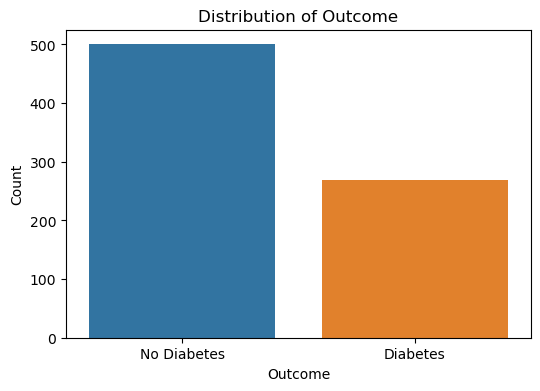

In [8]:
#Visualization 1: Distribution of Outcome (Diabetes vs. No Diabetes)
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Outcome')
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.show()


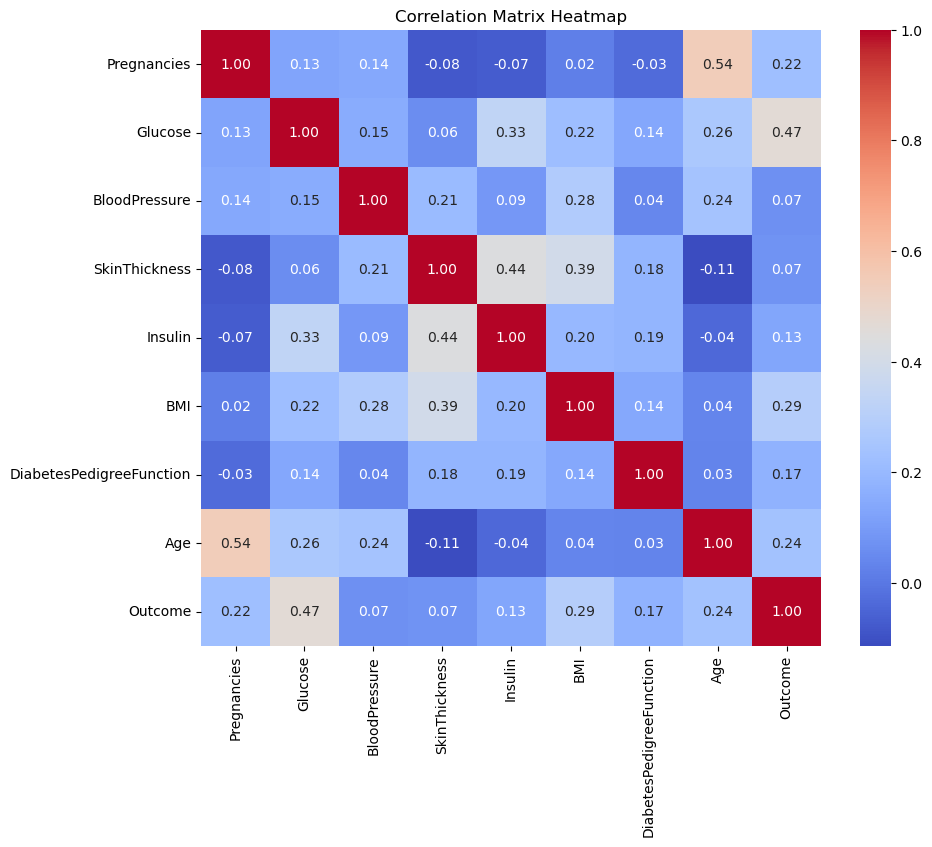

In [9]:
#Visualization 2: Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


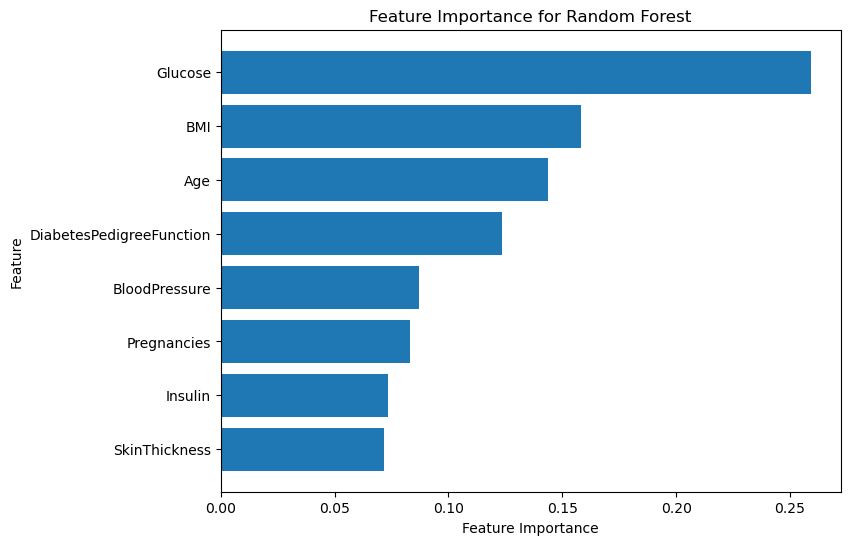

In [10]:
#Visualization 3: Feature Importance (For Tree-Based Models)
if 'Decision Tree' in models or 'Random Forest' in models:
    feature_importances = models['Random Forest'].feature_importances_
    sorted_indices = feature_importances.argsort()
    plt.figure(figsize=(8, 6))
    plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
    plt.yticks(range(len(sorted_indices)), [X.columns[i] for i in sorted_indices])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for Random Forest')
    plt.show()


In [11]:
#Visualization 4: Confusion Matrix (For Model Evaluation)
from sklearn.metrics import plot_confusion_matrix

plt.figure(figsize=(8, 6))
for name, model in models.items():
    disp = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, display_labels=['No Diabetes', 'Diabetes'])
    disp.ax_.set_title(f'Confusion Matrix - {name}')
plt.show()


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)